<a href="https://colab.research.google.com/github/srivastavas07/Mental-Fitness-Tracker-IBM-internship/blob/main/Kunal_Chandra_AI_Mental_Fitness_Tracker.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing The Libraries**

In [146]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [212]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')


# **Importing The Dataset**

In [148]:
data1=pd.read_csv('/content/drive/MyDrive/content/mental-and-substance-use-as-share-of-disease (1).csv')
data2=pd.read_csv('/content/drive/MyDrive/content/prevalence-by-mental-and-substance-use-disorder.csv')
data3= pd.read_csv('/content/drive/MyDrive/content/prevalence-of-depression-males-vs-females.csv')



# **Cleaning the Dataset**

In [149]:
data1.head()

,Entity,Code,Year,DALYs (Disability-Adjusted Life Years) - Mental disorders - Sex: Both - Age: All Ages (Percent)
0,Afghanistan,AFG,1990,1.696670
1,Afghanistan,AFG,1991,1.734281
2,Afghanistan,AFG,1992,1.791189
3,Afghanistan,AFG,1993,1.776779
4,Afghanistan,AFG,1994,1.712986


In [150]:
data2.head()

,Entity,Code,Year,Prevalence - Schizophrenia - Sex: Both - Age: Age-standardized (Percent),Prevalence - Bipolar disorder - Sex: Both - Age: Age-standardized (Percent),Prevalence - Eating disorders - Sex: Both - Age: Age-standardized (Percent),Prevalence - Anxiety disorders - Sex: Both - Age: Age-standardized (Percent),Prevalence - Drug use disorders - Sex: Both - Age: Age-standardized (Percent),Prevalence - Depressive disorders - Sex: Both - Age: Age-standardized (Percent),Prevalence - Alcohol use disorders - Sex: Both - Age: Age-standardized (Percent)
0,Afghanistan,AFG,1990,0.228979,0.721207,0.131001,4.835127,0.454202,5.125291,0.444036
1,Afghanistan,AFG,1991,0.228120,0.719952,0.126395,4.821765,0.447112,5.116306,0.444250
2,Afghanistan,AFG,1992,0.227328,0.718418,0.121832,4.801434,0.441190,5.106558,0.445501
3,Afghanistan,AFG,1993,0.226468,0.717452,0.117942,4.789363,0.435581,5.100328,0.445958
4,Afghanistan,AFG,1994,0.225567,0.717012,0.114547,4.784923,0.431822,5.099424,0.445779


In [151]:
data2['Year'].unique()

array([1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
       2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019])

In [152]:
data3.head()

,Entity,Code,Year,Prevalence - Depressive disorders - Sex: Male - Age: Age-standardized (Percent),Prevalence - Depressive disorders - Sex: Female - Age: Age-standardized (Percent),Population (historical estimates),Continent
0,Abkhazia,OWID_ABK,2015,NaN,NaN,NaN,Asia
1,Afghanistan,AFG,1990,4.291054,5.859656,12412311.0,NaN
2,Afghanistan,AFG,1991,4.293268,5.853078,13299016.0,NaN
3,Afghanistan,AFG,1992,4.298265,5.850020,14485543.0,NaN
4,Afghanistan,AFG,1993,4.303087,5.844987,15816601.0,NaN


In [153]:
data3.columns

Index(['Entity', 'Code', 'Year',
       'Prevalence - Depressive disorders - Sex: Male - Age: Age-standardized (Percent)',
       'Prevalence - Depressive disorders - Sex: Female - Age: Age-standardized (Percent)',
       'Population (historical estimates)', 'Continent'],
      dtype='object')

In [154]:
data3.drop('Code', axis=1, inplace=True)
data3.drop('Continent', axis=1, inplace=True)

In [155]:
dump = data3[(data3['Year']<1990) | (data3['Year']>2019)]
data3.drop(dump.index, inplace = True)

In [156]:
data3.isnull().sum()

Entity                                                                                  0
Year                                                                                    0
Prevalence - Depressive disorders - Sex: Male - Age: Age-standardized (Percent)      1197
Prevalence - Depressive disorders - Sex: Female - Age: Age-standardized (Percent)    1197
Population (historical estimates)                                                     739
dtype: int64

In [157]:
data3.dropna(inplace = True)

In [158]:
df = data1.merge(data2)
df = df.merge(data3)

In [159]:
df.isnull().sum().sum()

0

In [160]:
df.drop('Code', axis=1, inplace=True)

In [161]:
df.columns

Index(['Entity', 'Year',
       'DALYs (Disability-Adjusted Life Years) - Mental disorders - Sex: Both - Age: All Ages (Percent)',
       'Prevalence - Schizophrenia - Sex: Both - Age: Age-standardized (Percent)',
       'Prevalence - Bipolar disorder - Sex: Both - Age: Age-standardized (Percent)',
       'Prevalence - Eating disorders - Sex: Both - Age: Age-standardized (Percent)',
       'Prevalence - Anxiety disorders - Sex: Both - Age: Age-standardized (Percent)',
       'Prevalence - Drug use disorders - Sex: Both - Age: Age-standardized (Percent)',
       'Prevalence - Depressive disorders - Sex: Both - Age: Age-standardized (Percent)',
       'Prevalence - Alcohol use disorders - Sex: Both - Age: Age-standardized (Percent)',
       'Prevalence - Depressive disorders - Sex: Male - Age: Age-standardized (Percent)',
       'Prevalence - Depressive disorders - Sex: Female - Age: Age-standardized (Percent)',
       'Population (historical estimates)'],
      dtype='object')

In [162]:
df.set_axis(['Country','Year','mental_fitness','Schizophrenia', 'Bipolar_disorder', 'Eating_disorder','Anxiety','drug_usage','depression','alcohol','Male','Female','Population'], axis='columns', inplace=True)

<ipython-input-162-2658cb0b5eb5>:1: FutureWarning:

DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead



In [163]:
df.head(20)

,Country,Year,mental_fitness,Schizophrenia,Bipolar_disorder,Eating_disorder,Anxiety,drug_usage,depression,alcohol,Male,Female,Population
0,Afghanistan,1990,1.696670,0.228979,0.721207,0.131001,4.835127,0.454202,5.125291,0.444036,4.291054,5.859656,12412311.0
1,Afghanistan,1991,1.734281,0.228120,0.719952,0.126395,4.821765,0.447112,5.116306,0.444250,4.293268,5.853078,13299016.0
2,Afghanistan,1992,1.791189,0.227328,0.718418,0.121832,4.801434,0.441190,5.106558,0.445501,4.298265,5.850020,14485543.0
3,Afghanistan,1993,1.776779,0.226468,0.717452,0.117942,4.789363,0.435581,5.100328,0.445958,4.303087,5.844987,15816601.0
4,Afghanistan,1994,1.712986,0.225567,0.717012,0.114547,4.784923,0.431822,5.099424,0.445779,4.306053,5.843623,17075728.0
5,Afghanistan,1995,1.738272,0.224713,0.716686,0.111129,4.780851,0.428578,5.098495,0.445422,4.307069,5.843231,18110662.0
6,Afghanistan,1996,1.778098,0.223690,0.716388,0.107786,4.777272,0.426393,5.100580,0.444837,4.309518,5.846326,18853444.0
7,Afghanistan,1997,1.781815,0.222424,0.716143,0.103931,4.775242,0.423720,5.105474,0.443938,4.313820,5.851590,19357126.0
8,Afghanistan,1998,1.729402,0.221129,0.716139,0.100343,4.777377,0.422491,5.113707,0.442665,4.318713,5.859476,19737770.0
9,Afghanistan,1999,1.850988,0.220065,0.716323,0.097946,4.782067,0.421215,5.120480,0.441428,4.320813,5.865884,20170847.0


Checking Whether Every country's data is available between 1990 - 2019 or not.

In [164]:
country = df['Country'].unique()
count_dict = {}
for i in country:
  count_dict[i] = [df[df['Country'] == 'Afghanistan']['Year'].min(),df[df['Country'] == 'Afghanistan']['Year'].max(), df[df['Country'] == 'Afghanistan']['Year'].count()]

for key, value in count_dict.items():
  if value[2] != 30:
    print(key)


# **Feature Analysis on DataSet**

In [165]:
df.describe()

,Year,mental_fitness,Schizophrenia,Bipolar_disorder,Eating_disorder,Anxiety,drug_usage,depression,alcohol,Male,Female,Population
count,6150.000000,6150.000000,6150.000000,6150.000000,6150.000000,6150.000000,6150.000000,6150.000000,6150.000000,6150.000000,6150.000000,6.150000e+03
mean,2004.500000,4.793979,0.279364,0.671429,0.207104,4.306032,0.709513,3.936882,1.543491,3.141465,4.694066,6.349881e+07
std,8.656145,2.339855,0.046328,0.256775,0.153694,1.184078,0.409264,0.951828,0.926478,0.826469,1.151253,4.714192e+08
min,1990.000000,0.215647,0.191621,0.189344,0.045425,1.974823,0.225471,1.640902,0.319900,1.313565,1.962957,1.126000e+03
25%,1997.000000,2.942782,0.250777,0.540972,0.098393,3.571959,0.411990,3.220536,0.696025,2.607890,3.806154,1.128602e+06
50%,2004.500000,4.598223,0.286491,0.590016,0.151251,4.076615,0.624701,3.860081,1.433563,3.018331,4.673357,6.076861e+06
75%,2012.000000,6.356361,0.303925,0.898949,0.253406,4.747100,0.860416,4.546058,2.238553,3.608675,5.402910,2.090613e+07
max,2019.000000,13.761517,0.506018,1.676204,1.136541,9.015948,3.699504,7.688213,4.698694,7.258704,8.977151,7.713468e+09


In [166]:
df.corr()

<ipython-input-166-2f6f6606aa2c>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,Year,mental_fitness,Schizophrenia,Bipolar_disorder,Eating_disorder,Anxiety,drug_usage,depression,alcohol,Male,Female,Population
Year,1.000000,0.193068,0.047495,0.013270,0.077886,0.041429,0.047636,-0.033701,-0.009698,-0.008540,-0.048396,0.014651
mental_fitness,0.193068,1.000000,0.636081,0.615628,0.717500,0.627720,0.458583,-0.044763,0.162778,-0.068130,0.003892,-0.026553
Schizophrenia,0.047495,0.636081,1.000000,0.222379,0.569094,0.387662,0.674886,-0.384583,0.331779,-0.392608,-0.345832,0.057008
Bipolar_disorder,0.013270,0.615628,0.222379,1.000000,0.706504,0.605253,0.396225,0.188622,0.331712,0.091822,0.244914,-0.083970
Eating_disorder,0.077886,0.717500,0.569094,0.706504,1.000000,0.635668,0.667408,0.038392,0.338464,-0.007080,0.077582,-0.032799
Anxiety,0.041429,0.627720,0.387662,0.605253,0.635668,1.000000,0.445473,0.153941,0.149407,0.111071,0.181559,-0.038495
drug_usage,0.047636,0.458583,0.674886,0.396225,0.667408,0.445473,1.000000,-0.114005,0.424243,-0.136931,-0.100225,0.009622
depression,-0.033701,-0.044763,-0.384583,0.188622,0.038392,0.153941,-0.114005,1.000000,-0.022596,0.944300,0.973887,-0.031630
alcohol,-0.009698,0.162778,0.331779,0.331712,0.338464,0.149407,0.424243,-0.022596,1.000000,-0.101451,0.001603,-0.005477
Male,-0.008540,-0.068130,-0.392608,0.091822,-0.007080,0.111071,-0.136931,0.944300,-0.101451,1.000000,0.850851,-0.031482


<ipython-input-167-4a7d661a92fc>:3: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



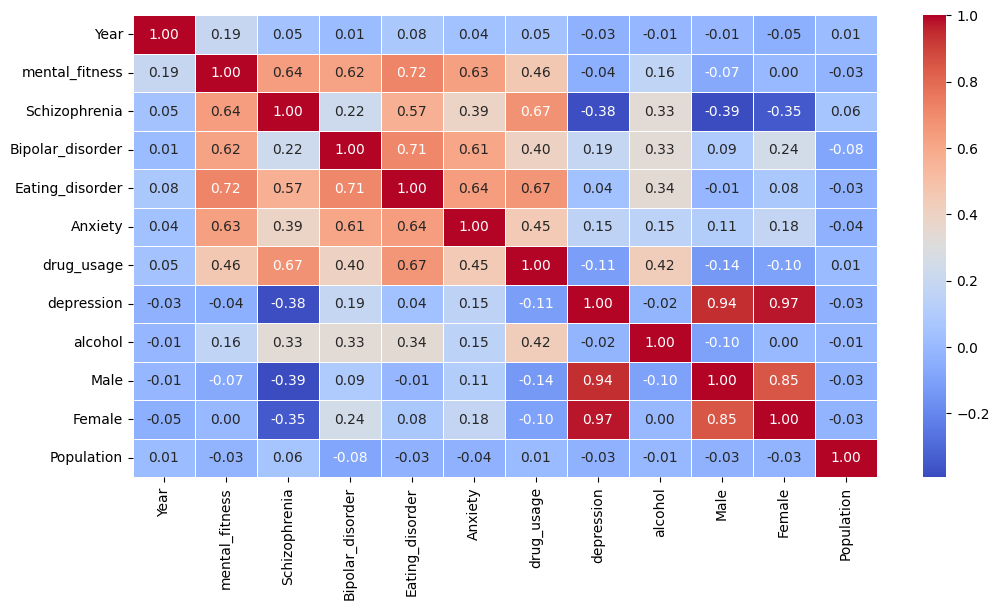

In [167]:
plt.figure(figsize=(12,6))
custom_palette = sns.color_palette("coolwarm", as_cmap=True)
sns.heatmap(df.corr(), cmap=custom_palette, annot=True, fmt=".2f", linewidths=0.5)
plt.show()

In [168]:
fig = px.pie(df, values='mental_fitness', names='Year')
fig.show()


Using Labele Encoder for Encoding Country

In [169]:
from sklearn.preprocessing import LabelEncoder
l=LabelEncoder()
for i in df.columns:
    if df[i].dtype == 'object':
      df['Country']=l.fit_transform(df['Country'])

In [170]:
df.head()

,Country,Year,mental_fitness,Schizophrenia,Bipolar_disorder,Eating_disorder,Anxiety,drug_usage,depression,alcohol,Male,Female,Population
0,0,1990,1.696670,0.228979,0.721207,0.131001,4.835127,0.454202,5.125291,0.444036,4.291054,5.859656,12412311.0
1,0,1991,1.734281,0.228120,0.719952,0.126395,4.821765,0.447112,5.116306,0.444250,4.293268,5.853078,13299016.0
2,0,1992,1.791189,0.227328,0.718418,0.121832,4.801434,0.441190,5.106558,0.445501,4.298265,5.850020,14485543.0
3,0,1993,1.776779,0.226468,0.717452,0.117942,4.789363,0.435581,5.100328,0.445958,4.303087,5.844987,15816601.0
4,0,1994,1.712986,0.225567,0.717012,0.114547,4.784923,0.431822,5.099424,0.445779,4.306053,5.843623,17075728.0


# **Select K Best Method**

In [171]:
from sklearn.feature_selection import SelectKBest,  f_regression

In [172]:
y = df['mental_fitness']
y = np.array(y).reshape(-1,1)

In [173]:
x = df.drop(columns='mental_fitness', axis=1)

In [174]:
from sklearn.preprocessing import StandardScaler

s = StandardScaler()
x_scaled = s.fit_transform(x)

In [175]:
kbest = SelectKBest(score_func=f_regression, k='all')

In [176]:
x_new = kbest.fit_transform(x_scaled, y)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [177]:
scores = pd.DataFrame(kbest.scores_)
column = pd.DataFrame(x.columns)

In [178]:
featureScores = pd.concat([column, scores], axis=1)

In [179]:
featureScores.columns = ['Features', 'feature_imp']

In [180]:
featureScores.sort_values(by = 'feature_imp', ascending=False, inplace=True)
featureScores

,Features,feature_imp
4,Eating_disorder,6523.233361
2,Schizophrenia,4177.824086
5,Anxiety,3997.758239
3,Bipolar_disorder,3752.125081
6,drug_usage,1637.218672
1,Year,238.040439
8,alcohol,167.335167
9,Male,28.670002
7,depression,12.343464
0,Country,4.671588


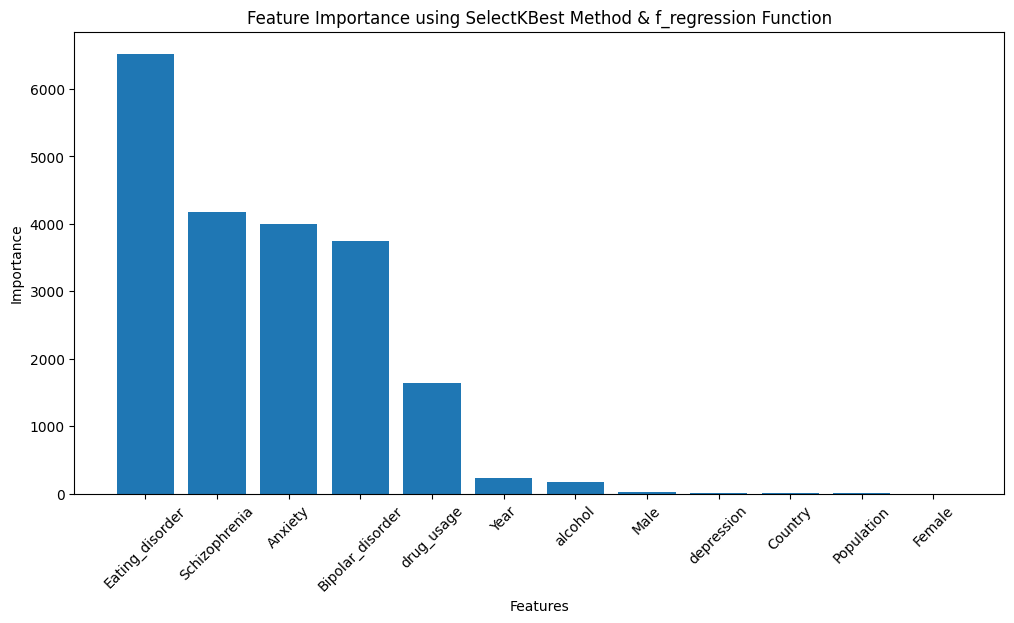

In [181]:
plt.figure(figsize = (12, 6))
plt.bar(featureScores.Features, featureScores.feature_imp)
plt.xticks(rotation = 45)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.title("Feature Importance using SelectKBest Method & f_regression Function")
plt.show()

# **Extra Tree Regressor**

In [182]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor(n_estimators=100, random_state=42)

In [183]:
model.fit(x_scaled,y)

<ipython-input-183-05286c0eb6a2>:1: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



ExtraTreesRegressor(random_state=42)

In [184]:
feature_importances = pd.DataFrame(model.feature_importances_, index = x.columns, columns = ["feature_imp"])
feature_importances.sort_values(by = 'feature_imp', ascending=False, inplace = True)
feature_importances

,feature_imp
Eating_disorder,0.249616
Bipolar_disorder,0.231759
Schizophrenia,0.225265
Anxiety,0.106737
alcohol,0.033820
Year,0.031301
drug_usage,0.028949
Male,0.026245
Female,0.020699
Country,0.017051


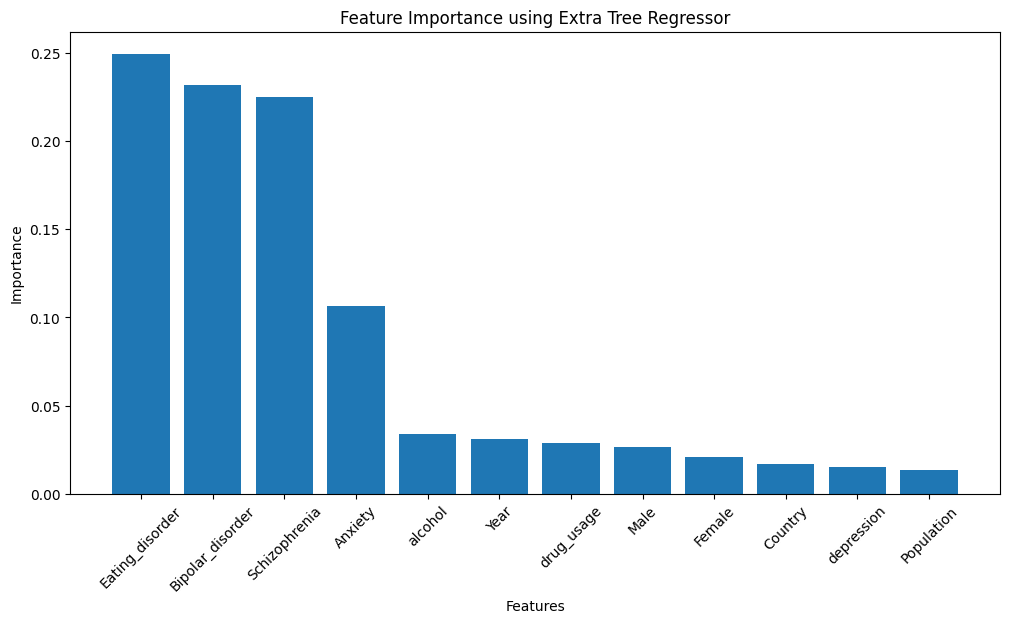

In [185]:
plt.figure(figsize = (12, 6))
plt.bar(feature_importances.index, feature_importances.feature_imp)
plt.xticks(rotation = 45)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.title("Feature Importance using Extra Tree Regressor")
plt.show()

# **Spliting the Dataset into Training set and Test set**

In [186]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

from sklearn.metrics import accuracy_score


# MinMaxScaled Dataset

In [187]:
x_new = x.copy()
from sklearn.preprocessing import MinMaxScaler
x_new = MinMaxScaler().fit_transform(x_new)
x_train_new,x_test_new,y_train_new,y_test_new=train_test_split(x_new,y,test_size=0.2,random_state=0)

# **Implementing the Regression Algorithms and choose which one is better based on results**

# **1)Linear regression**

In [188]:
from sklearn.linear_model import LinearRegression

lr=LinearRegression()
lr.fit(x_train,y_train)

#predicting the value

y_pred=lr.predict(x_test)

#evaluating the model

from sklearn.metrics import r2_score,mean_squared_error
print("Results for Linear Regression:\n1)Mean Square Error={}\n2)R-Square Score={}".format(mean_squared_error(y_test,y_pred),r2_score(y_test,y_pred)))



Results for Linear Regression:
1)Mean Square Error=1.2137605801769489
2)R-Square Score=0.7883592798792993


# **After MinMaxScaler with Linear Regressor**

In [189]:
from sklearn.linear_model import LinearRegression

lr=LinearRegression()
lr.fit(x_train_new,y_train_new)

y_pred_new=lr.predict(x_test_new)

print("Results for Linear Regression:\n1)Mean Square Error={}\n2)R-Square Score={}".format(mean_squared_error(y_test_new,y_pred_new),r2_score(y_test_new,y_pred_new)))



Results for Linear Regression:
1)Mean Square Error=1.2137605801800728
2)R-Square Score=0.7883592798787546


In [190]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'fit_intercept': [True, False]
}

grid_search = GridSearchCV(lr, param_grid, cv=10, scoring='neg_mean_squared_error')

grid_search.fit(x_train_new, y_train_new)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_


y_pred = best_model.predict(x_test_new)

mse = mean_squared_error(y_test_new, y_pred_new)
print("Best Hyperparameters:", best_params)
print("Mean Squared Error:", mse)


Best Hyperparameters: {'fit_intercept': True}
Mean Squared Error: 1.2137605801800728


# **2)SVM Regression**

In [191]:
from sklearn.svm import SVR
svr=SVR()
svr.fit(x_train,y_train)

y_pred=svr.predict(x_test)

print("Results for SVM Regression:\n1)Mean Square Error={}\n2)R-Square Score={}".format(mean_squared_error(y_test,y_pred),r2_score(y_test,y_pred)))




/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Results for SVM Regression:
1)Mean Square Error=5.770686663231597
2)R-Square Score=-0.006221738408417332


# **After MinMaxScaling with SVR**

In [192]:
from sklearn.svm import SVR
svr=SVR()
svr.fit(x_train_new,y_train_new)

y_pred_new=svr.predict(x_test_new)

print("Results for SVR:\n1)Mean Square Error={}\n2)R-Square Score={}".format(mean_squared_error(y_test_new,y_pred_new),r2_score(y_test_new,y_pred_new)))



/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Results for SVR:
1)Mean Square Error=0.47876219979703416
2)R-Square Score=0.9165193050536843


Mean Squared Error was decreased from 5.77 to 0.47 by applying the MinMaxScaler on Training Dataset.

In [193]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'kernel': ['linear', 'poly', 'rbf']
}
grid_search = GridSearchCV(estimator=svr, param_grid=param_grid, cv=5)

grid_search.fit(x_train_new, y_train_new)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_


y_pred = best_model.predict(x_test_new)

mse = mean_squared_error(y_test_new, y_pred)
print("Best Hyperparameters:", best_params)
print("Mean Squared Error:", mse)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143

Best Hyperparameters: {'kernel': 'rbf'}
Mean Squared Error: 0.47876219979703416


Best Hyperparameters: {'kernel': 'rbf'}

Mean Squared Error: 0.433318784071667

# **3)Decision Tree Regression**

In [194]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor(random_state=0)
dtr.fit(x_train,y_train)

y_pred=dtr.predict(x_test)

print("Results for Decision Tree Regression:\n1)Mean Square Error={}\n2)R-Square Score={}".format(mean_squared_error(y_test,y_pred),r2_score(y_test,y_pred)))




Results for Decision Tree Regression:
1)Mean Square Error=0.062104579666783975
2)R-Square Score=0.989170963221136


# **After MinMaxScaling with Decision Tree**

In [195]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor(random_state=0)
dtr.fit(x_train_new,y_train_new)
y_pred_new=dtr.predict(x_test_new)
print("Results for Decision Tree Regression:\n1)Mean Square Error={}\n2)R-Square Score={}".format(mean_squared_error(y_test_new,y_pred_new),r2_score(y_test_new,y_pred_new)))


Results for Linear Regression:
1)Mean Square Error=0.05349265529333496
2)R-Square Score=0.9906726052301028


R-Square value was increased by 1% and Mean Square Error was decreased by 0.1

# **4)Random Forest Regression**

In [196]:
from sklearn.ensemble import RandomForestRegressor
rfr= RandomForestRegressor(n_estimators=10,random_state=42)
rfr.fit(x_train,y_train)

y_pred=rfr.predict(x_test)

print("Results for Random Forest Regression:\n1)Mean Square Error={}\n2)R-Square Score={}".format(mean_squared_error(y_test,y_pred),r2_score(y_test,y_pred)))




<ipython-input-196-1ea13cad8022>:3: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Results for Decision Tree Regression:
1)Mean Square Error=0.036060648045054114
2)R-Square Score=0.993712185380776


# **After MinMaxSclaing With Randorm Forest Regression**

In [197]:
from sklearn.ensemble import RandomForestRegressor
rfr= RandomForestRegressor(n_estimators=10,random_state=42)
rfr.fit(x_train_new,y_train_new)

y_pred_new=rfr.predict(x_test_new)

print("Results for Random Forest Regression:\n1)Mean Square Error={}\n2)R-Square Score={}".format(mean_squared_error(y_test_new,y_pred_new),r2_score(y_test_new,y_pred_new)))


<ipython-input-197-ef9de53caab0>:3: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Results for Linear Regression:
1)Mean Square Error=0.03405875905740535
2)R-Square Score=0.9940612502901719


R-Square value was increased by 0.001% and Mean Square Error was decreased by 0.002

In [198]:
param_grid = {
    'n_estimators': [50],
    'max_depth': [None,1,2,5],
    'min_samples_split': [1, 2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=rfr, param_grid=param_grid, cv=5)
grid_search.fit(x_train_new, y_train_new)
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/usr/local/lib/python3.10/dist-packa

Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Best Score: 0.991278821457796


Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}

Best Score: 0.991314163450339

# **Conclusion:**

# **Random Forest Regression works** well on both train and test sets with r2 score of 0.99.

# As well as **Decision Tree Regression** also works well on both train and test set with r2 score of 0.99.

In [201]:
x

,Country,Year,Schizophrenia,Bipolar_disorder,Eating_disorder,Anxiety,drug_usage,depression,alcohol,Male,Female,Population
0,0,1990,0.228979,0.721207,0.131001,4.835127,0.454202,5.125291,0.444036,4.291054,5.859656,12412311.0
1,0,1991,0.228120,0.719952,0.126395,4.821765,0.447112,5.116306,0.444250,4.293268,5.853078,13299016.0
2,0,1992,0.227328,0.718418,0.121832,4.801434,0.441190,5.106558,0.445501,4.298265,5.850020,14485543.0
3,0,1993,0.226468,0.717452,0.117942,4.789363,0.435581,5.100328,0.445958,4.303087,5.844987,15816601.0
4,0,1994,0.225567,0.717012,0.114547,4.784923,0.431822,5.099424,0.445779,4.306053,5.843623,17075728.0
...,...,...,...,...,...,...,...,...,...,...,...,...
6145,204,2015,0.209359,0.560882,0.099610,3.315701,0.599604,3.548613,1.734969,3.090039,3.927306,13814642.0
6146,204,2016,0.209979,0.561768,0.100821,3.324230,0.603658,3.557508,1.689281,3.094447,3.938356,14030338.0
6147,204,2017,0.210631,0.562612,0.101671,3.330569,0.608096,3.564138,1.651805,3.097194,3.946231,14236599.0
6148,204,2018,0.211237,0.563283,0.102398,3.317500,0.609065,3.563141,1.686711,3.092207,3.947673,14438812.0


In [216]:

print("Welcome to Mental Fitness Tracker!\n Provide details to check mental fitness of the country!")
country=input('Enter Your country Name:')
year=int(input("Enter the Year:"))
schi=(float(input("Enter Schizophrenia rate in % (if not enter 0):")))*100
bipo_dis=(float(input("Enter Bipolar disorder rate in % (if not enter 0):")))*100
eat_dis=(float(input("Enter Eating disorder rate in % (if not enter 0):")))*100
anx=(float(input("Enter Anxiety rate in % (if not enter 0):")))*10
drug_use=(float(input("Enter Drug Usage rate in per year % (if not enter 0):")))*100
depr=(float(input("Enter Depression rate in % (it not enter 0):")))*10
alch=(float(input("Enter Alcohol Consuming rate per year in % (if not enter 0):")))*100
male=(float(input("Enter the percentage % of male suffering in population (if not enter 0):")))*100
female=(float(input("Enter the percentage % of female suffering in population (if not enter 0):")))*100
population=(float(input("Enter the population suffering:")))*100
# Create a dictionary to hold the input data
input_data = {
    'Country': country,
    'Year': year,
    'Schizophrenia': schi,
    'Bipolar_disorder': bipo_dis,
    'Eating_disorder': eat_dis,
    'Anxiety': anx,
    'drug_usage': drug_use,
    'depression': depr,
    'alcohol': alch,
    'Male':male,
    'Female':female,
    'Population':population
}

# Convert the dictionary to a DataFrame for one-hot encoding
input_df = pd.DataFrame([input_data])
input_df_encoded = pd.get_dummies(input_df, columns=['Country'])
prediction=rfr.predict(input_df_encoded)
print("Your Mental Fitness is {}%".format(prediction*10))
print("Bye...!")

Welcome to Mental Fitness Tracker!
 Provide details to check mental fitness of the country!
Enter Your country Name:india
Enter the Year:2009
Enter Schizophrenia rate in % (if not enter 0):1
Enter Bipolar disorder rate in % (if not enter 0):2
Enter Eating disorder rate in % (if not enter 0):3
Enter Anxiety rate in % (if not enter 0):4
Enter Drug Usage rate in per year % (if not enter 0):5
Enter Depression rate in % (it not enter 0):6
Enter Alcohol Consuming rate per year in % (if not enter 0):6
Enter the percentage % of male suffering in population (if not enter 0):7
Enter the percentage % of female suffering in population (if not enter 0):8
Enter the population suffering:100000
Your Mental Fitness is [74.30810367]%
Bye...!


In [218]:
git


NameError: ignored